# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - Identifying the implicit missing values of attributes and replacing them with an explicit missing value using [Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
    - removing explicit missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [3]:
import pandas as pd
import sklearn.model_selection

## Defining Problem Statement

## Data Collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print("df size:", df.shape)
print("df train size:", df_train.shape)
print("df test size:", df_test.shape)

df size: (32561, 15)
df train size: (24420, 15)
df test size: (8141, 15)


## Data Exploration

In [6]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

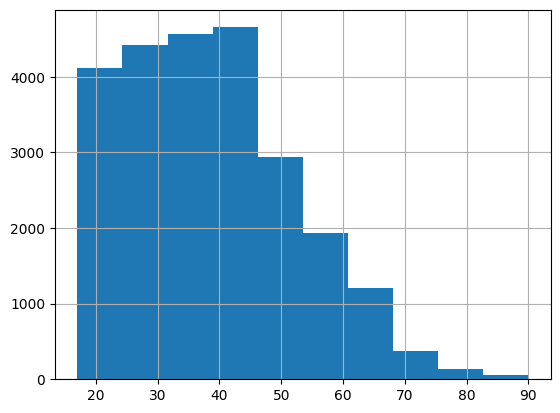

In [11]:
df_train["age"].hist() ## shows the histogram of the age which is int64 datatype

In [12]:
df_train["workclass"].value_counts() ## gives number of unique values in each workclass type, example, private is repeated 17018 times

 Private             17018
 Self-emp-not-inc     1915
 Local-gov            1606
 ?                    1372
 State-gov             955
 Self-emp-inc          821
 Federal-gov           721
 Without-pay             8
 Never-worked            4
Name: workclass, dtype: int64

<Axes: >

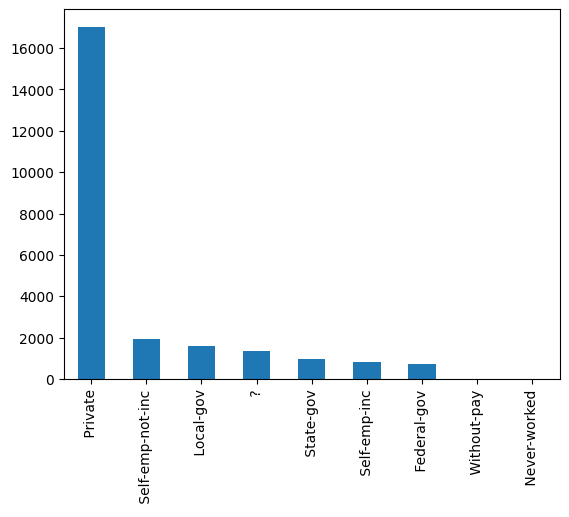

In [14]:
df_train["workclass"].value_counts().plot(kind="bar") ## you can have bar charts for cartegory types, you can use this to find missing values

In [15]:
df_train["workclass"].unique()

array([' Self-emp-inc', ' Private', ' Self-emp-not-inc', ' Local-gov',
       ' ?', ' Never-worked', ' Federal-gov', ' State-gov',
       ' Without-pay'], dtype=object)

In [16]:
df_train["target"].value_counts() ## important to check the distribution of the target label to ensure evenly distribution

 <=50K    18478
 >50K      5942
Name: target, dtype: int64

<Axes: >

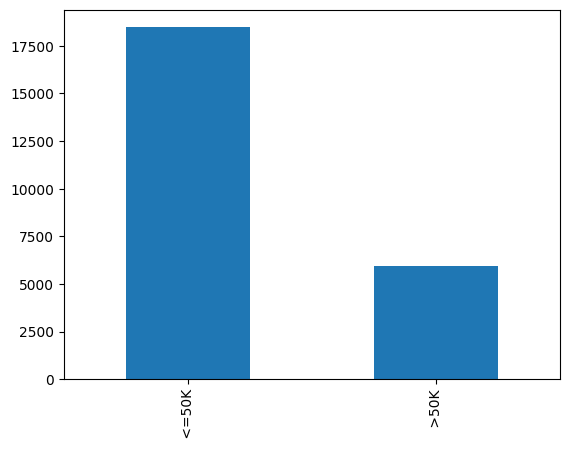

In [19]:
df_train["target"].value_counts().plot(kind="bar")

## Data Preprocessing

[] # TODO: Get rid of row with implicit missing value which is ?